In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
spam_ham=pd.read_csv("/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv")        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spam_ham.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
spam_ham.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
spam_ham.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [6]:
spam_ham['text'].isnull().sum()

0

In [7]:
print(spam_ham.columns)


Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


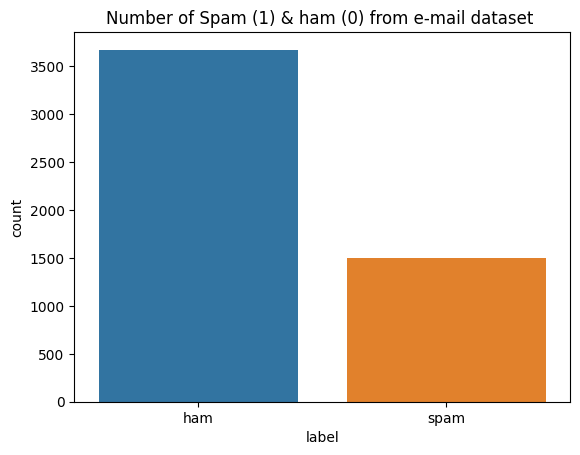

In [8]:
sns.countplot(x='label', data = spam_ham)
plt.title('Number of Spam (1) & ham (0) from e-mail dataset ')
plt.show()

In [9]:
def sum_func(df,column): # this function will help in counting the same group entries
    for i in range(len(column)):
        count = df[column].value_counts()
        return count

sum_func(spam_ham, 'label')


label
ham     3672
spam    1499
Name: count, dtype: int64

In [10]:
spam_ham['label'] = spam_ham['label'].map({'ham': 0, 'spam': 1})
print( "Spam percentage is ",spam_ham['label'].sum()/len(spam_ham.index)* 100, "%")


Spam percentage is  28.98859021465867 %


In [11]:
numpy_array = spam_ham.to_numpy()


X = numpy_array[:, 0]  
y = numpy_array[:, 1]

In [12]:

X= spam_ham.text
y= spam_ham.label
#X=numpy_array[:,0]
#y=numpy_array[:,1]
#y = y.astype('int')
print("X")
print(X)
print("y")
print(y)

X
0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object
y
0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label, Length: 5171, dtype: int64


In [13]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)
X_train

3829    Subject: marathon oil company meter 098 - 6599...
469     Subject: nov 1 st entex nom\r\n- - - - - - - -...
4887    Subject: announcing outlook web access for hou...
4950    Subject: \r\n( envelope - from 20040929124340 ...
2563    Subject: \r\nthis week only : f . ree gen . er...
                              ...                        
4149    Subject: re : panenergy marketing march 2000 p...
1890    Subject: re : another hesco issue\r\nhelp . st...
350     Subject: nine best generic meds for cheap !\r\...
79      Subject: @ ect . enron . com email notificatio...
3927    Subject: liffe is great\r\nhello ,\r\nvlsit ou...
Name: text, Length: 3878, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect= CountVectorizer(stop_words="english")
vect.fit(X_train)

# printing the Vocabulary texts



CountVectorizer(stop_words='english')

In [15]:
X_train.shape

(3878,)

In [16]:
X_train_transformed= vect.transform(X_train)
X_test_transformed = vect.transform(X_test)
#print(X_train_transformed)
print(X_test_transformed)


  (0, 668)	1
  (0, 2198)	1
  (0, 4227)	1
  (0, 4733)	1
  (0, 6664)	1
  (0, 7662)	1
  (0, 11422)	1
  (0, 11710)	1
  (0, 12032)	1
  (0, 14683)	1
  (0, 15039)	1
  (0, 15843)	1
  (0, 17994)	1
  (0, 19119)	1
  (0, 19121)	1
  (0, 19190)	1
  (0, 19258)	1
  (0, 20195)	1
  (0, 20476)	1
  (0, 20921)	1
  (0, 24248)	1
  (0, 25116)	1
  (0, 25157)	1
  (0, 25566)	1
  (0, 26135)	1
  :	:
  (1292, 32711)	1
  (1292, 32998)	1
  (1292, 33275)	1
  (1292, 34371)	1
  (1292, 34458)	1
  (1292, 34838)	1
  (1292, 34841)	1
  (1292, 35550)	2
  (1292, 35993)	1
  (1292, 36070)	1
  (1292, 36888)	1
  (1292, 36943)	1
  (1292, 37129)	1
  (1292, 37666)	1
  (1292, 37910)	1
  (1292, 37957)	1
  (1292, 37971)	1
  (1292, 38427)	1
  (1292, 38696)	1
  (1292, 39017)	1
  (1292, 39529)	1
  (1292, 40240)	1
  (1292, 40721)	1
  (1292, 41199)	2
  (1292, 42003)	1


In [17]:
X_train_transformed

<3878x42487 sparse matrix of type '<class 'numpy.int64'>'
	with 252941 stored elements in Compressed Sparse Row format>

In [18]:
X_train_transformed.shape

(3878, 42487)

In [19]:
y_train

3829    0
469     0
4887    0
4950    1
2563    1
       ..
4149    0
1890    0
350     1
79      0
3927    1
Name: label, Length: 3878, dtype: int64

In [20]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train_transformed, y_train)
proba= bnb.predict_proba(X_test_transformed)
y_pred= bnb.predict(X_test_transformed)

#Converting array to data frame
#proba = pd.DataFrame(proba)
#proba.tail()
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8329466357308585

In [21]:
from sklearn import metrics
confusion= metrics.confusion_matrix(y_test, y_pred)
print(confusion)


[[889  19]
 [197 188]]


In [22]:
pd.DataFrame(proba, columns=['Ham','Spam'])

,Ham,Spam
0,1.283685e-05,9.999872e-01
1,5.475604e-01,4.524396e-01
2,2.602180e-111,1.000000e+00
3,1.000000e+00,2.498944e-26
4,9.865133e-01,1.348671e-02
...,...,...
1288,1.000000e+00,5.759712e-90
1289,1.000000e+00,9.621926e-45
1290,1.000000e+00,1.914828e-30
1291,1.000000e+00,6.193757e-15


In [23]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
sensitivity = TP/float(TP+FN)
print("Sensitivity= ",sensitivity)
specificity= TN/float(TN+FP)
print("Specificity= ", specificity)
print("Precision= ", TP/float(TP+FP))

print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

Sensitivity=  0.4883116883116883
Specificity=  0.9790748898678414
Precision=  0.9082125603864735
PRECISION SCORE : 0.9082125603864735
RECALL SCORE : 0.4883116883116883
F1 SCORE : 0.6351351351351352
